# Basic Regression Models

In [1]:
# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# model
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import neural_network
from sklearn import metrics

# other models
from statsmodels.tsa.vector_ar.var_model import VAR

# load data
from utils import read_data

In [2]:
dataset = read_data(normalize = True)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [3]:
print(dataset.train_val_df.columns)
# drop columns
cols = ['station', 'time_stamp']
train_val_df = dataset.train_val_df.drop(columns=cols)
test_df = dataset.test_df.drop(columns=cols)

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'station', 'time_stamp', 'WD_E', 'WD_ENE', 'WD_ESE',
       'WD_N', 'WD_NE', 'WD_NNE', 'WD_NNW', 'WD_NW', 'WD_S', 'WD_SE', 'WD_SSE',
       'WD_SSW', 'WD_SW', 'WD_W', 'WD_WNW', 'WD_WSW'],
      dtype='object')


In [4]:
train_val_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
count,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000,323618.000000
mean,78.527529,0.103107,0.032568,0.168942,0.110376,0.056216,0.553524,0.457240,0.636867,0.000935,0.132619,0.073757,0.082063,0.059533,0.074767,0.092739,0.064867,0.059425,0.073479,0.047161,0.046567,0.043422,0.056103,0.068602,0.044892,0.061736,0.050887
std,77.789194,0.089700,0.044555,0.119329,0.110260,0.054175,0.183354,0.171288,0.188765,0.011638,0.095277,0.261375,0.274461,0.236620,0.263016,0.290067,0.246291,0.236419,0.260921,0.211982,0.210710,0.203804,0.230121,0.252777,0.207068,0.240676,0.219768
min,2.000000,0.000000,0.000000,0.003369,0.000000,0.000000,0.000000,0.000000,0.102069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.035105,0.005432,0.076040,0.040404,0.011941,0.391870,0.319536,0.481379,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.082247,0.015438,0.141790,0.080808,0.044627,0.575610,0.445364,0.649655,0.000000,0.106061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.000000,0.144433,0.040578,0.238685,0.141414,0.080115,0.705691,0.589404,0.809655,0.000000,0.174242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,844.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [5]:
train_count = int(train_val_df.shape[0]*0.8)

X_train = train_val_df[0:train_count].drop(columns=["PM2.5"])
y_train = train_val_df[0:train_count]["PM2.5"]

X_validation = train_val_df[train_count:].drop(columns=["PM2.5"])
y_validation = train_val_df[train_count:]["PM2.5"]

X_test = test_df.drop(columns=["PM2.5"])
y_test = test_df["PM2.5"]
X_train.describe()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
count,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000,258894.000000
mean,0.105714,0.034209,0.179047,0.113733,0.054833,0.554323,0.456245,0.639729,0.000941,0.130082,0.076039,0.089017,0.058692,0.068202,0.098129,0.060762,0.053350,0.071651,0.044296,0.042867,0.038247,0.058715,0.076433,0.046726,0.060210,0.056664
std,0.090384,0.046244,0.120208,0.111223,0.054250,0.183060,0.170493,0.188882,0.011727,0.094265,0.265061,0.284769,0.235048,0.252092,0.297490,0.238894,0.224731,0.257910,0.205753,0.202558,0.191793,0.235091,0.265690,0.211051,0.237876,0.231200
min,0.000000,0.000000,0.003369,0.000000,0.000000,0.000000,0.000000,0.111724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037111,0.005432,0.086421,0.040404,0.010073,0.393496,0.319536,0.484138,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.085256,0.015438,0.155632,0.080808,0.042759,0.577236,0.443709,0.653793,0.000000,0.106061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.147442,0.043454,0.249066,0.141414,0.078247,0.705691,0.589404,0.812414,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.995988,1.000000,0.982697,1.000000,1.000000,1.000000,0.986755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
def model_fit_evaluate(reg, x_train, y_train, x_validation, y_validation,x_test,y_test  ):
    # Fit the mode: 
    print('Model \n', reg)
    reg.fit(x_train, y_train)
    
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    y_test_pred = reg.predict(x_test)
    
    def result(y,y_pred):
        
        def custom(y_true, y_pred,slack):
            diff = ((np.abs(y_true - y_pred)-slack)<0).astype(int) 
            return diff.mean()
        
        # The coefficients
        if hasattr(reg, 'coef_'):
            print('Coefficients: \n', reg.coef_)
        if hasattr(reg, 'feature_importances_'):
            print('Feature Importances: \n', reg.feature_importances_)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination:', metrics.r2_score(y, y_pred))
        print('+-10 acc', custom(y, y_pred,10))
        print('+-20 acc', custom(y, y_pred,20))
        print('+-50 acc', custom(y, y_pred,50))
        print('+-100 acc', custom(y, y_pred,100))

        print(y[1:5])
        print(y_pred[1:5])
        
        


        # The line / model
        plt.figure(figsize=(8,8))
        lineStart = y.min() 
        lineEnd = y.max() 
        plt.scatter(y, y_pred, marker='x')
        plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
        plt.xlim(lineStart, lineEnd)
        plt.ylim(lineStart, lineEnd)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
    
    print("===================Validation=====================")
    result(y_validation, y_validation_pred)
    print("======================Test========================")
    result(y_test, y_test_pred)
    





# 1. Linear Regression

Model 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
===================Validation=====================
Coefficients: 
 [ 5.08075648e+02  6.05325553e+01  2.88754902e+01  2.14507273e+02
  1.14894708e+02 -6.91897724e+01  2.34662001e+01  1.06966099e+02
 -4.09980926e+01  1.56441885e+00 -8.10469328e+13 -8.10469328e+13
 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13
 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13
 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13 -8.10469328e+13
 -8.10469328e+13 -8.10469328e+13]
Mean Absolute Error: 19.92914341086768
Mean Squared Error: 941.5489219028525
Root Mean Squared Error: 30.6846691672381
Coefficient of determination: 0.836283155792505
+-10 acc 0.3977040973981831
+-20 acc 0.6688554477473581
+-50 acc 0.9200142142018417
+-100 acc 0.9868209628576726
285027    83.0
285028    79.0
285029    80.0
285030    75.0
Name: PM2.5, dtype: float64
[71.59375 70.75    75.46875 76.65625]
======

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

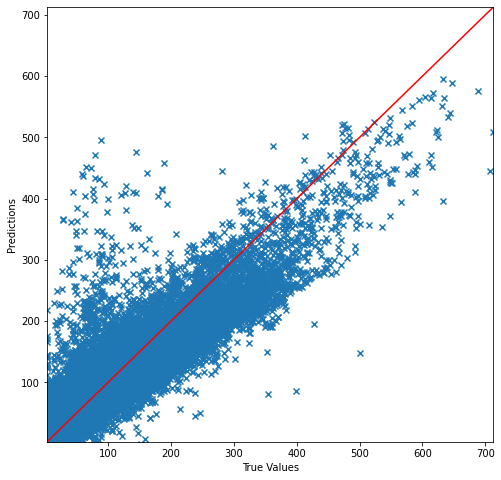

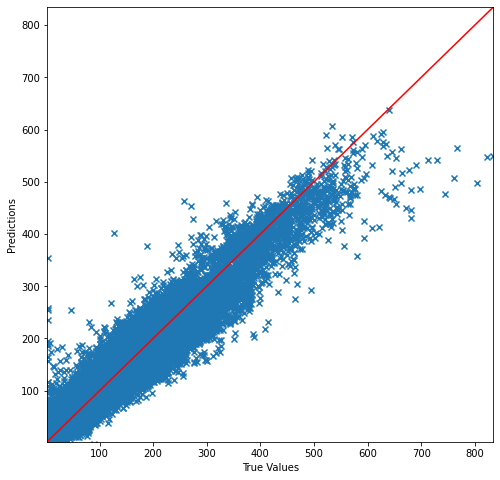

In [7]:
reg_linear = linear_model.LinearRegression()
model_fit_evaluate(reg_linear, X_train, y_train, X_validation, y_validation, X_test, y_test)

# 2. LARS Lasso
Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

Model 
 LassoLars(alpha=0.005, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
===================Validation=====================
Coefficients: 
 [505.40551481   1.44173388   8.22380875 241.46709298   0.
   0.           0.          29.61175965   0.          -6.52548195
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        ]
Mean Absolute Error: 19.689579688713078
Mean Squared Error: 994.5318101498731
Root Mean Squared Error: 31.536198409920512
Coefficient of determination: 0.8270704733083382
+-10 acc 0.4441938075520672
+-20 acc 0.6910419627958717
+-50 acc 0.911223039367159
+-100 acc 0.9844107286323466
285027    83.0
285028    79.0
285029    80.0
285030    75.0
Name: PM2.5, dtype: float64
[67.09043346 66.02349196 71.24558861 73.90981959]
===

LassoLars(alpha=0.005, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

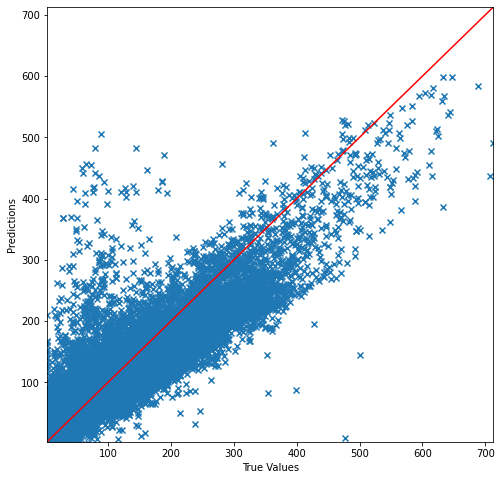

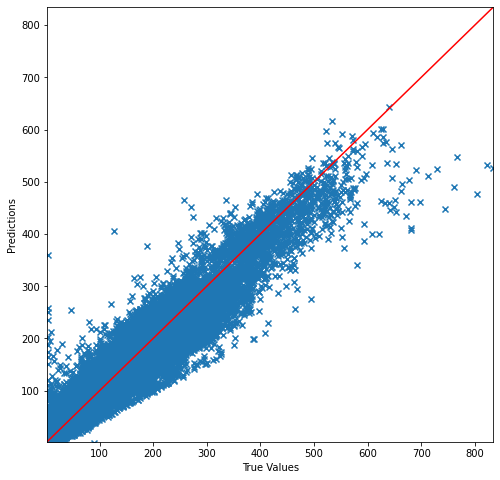

In [8]:
%%time
reg_lasso = linear_model.LassoLars(alpha=.005)
model_fit_evaluate(reg_lasso, X_train, y_train, X_validation, y_validation, X_test, y_test)

# 3. Linear SVM Regression

Model 
 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)
===================Validation=====================
Coefficients: 
 [ 5.46167597e+02  3.95631686e+01 -1.03881103e+01  2.24708330e+02
  7.29720956e+01 -4.06948786e+01  1.52590043e+01  6.42613736e+01
 -1.83291248e+01  3.69400416e+00 -1.32435854e+00 -2.29223735e+00
 -3.54030053e-01 -1.86886112e+00 -1.97361118e+00 -2.10702751e+00
 -2.02091059e+00 -2.39428375e+00 -6.07664276e-01 -7.37082764e-01
 -7.33486970e-01 -1.12370631e+00 -3.08155768e+00 -3.65996021e+00
 -2.80938918e+00 -3.13099050e+00]
Mean Absolute Error: 18.86070205873243
Mean Squared Error: 945.4850414402732
Root Mean Squared Error: 30.748740485429206
Coefficient of determination: 0.83559874199934
+-10 acc 0.46447994561522776
+-20 acc 0.7007756010135344
+-50 acc 0.9192726036709721
+-100 acc 0.9866819108831345
285027    83.0
285028    79.0
285029    

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

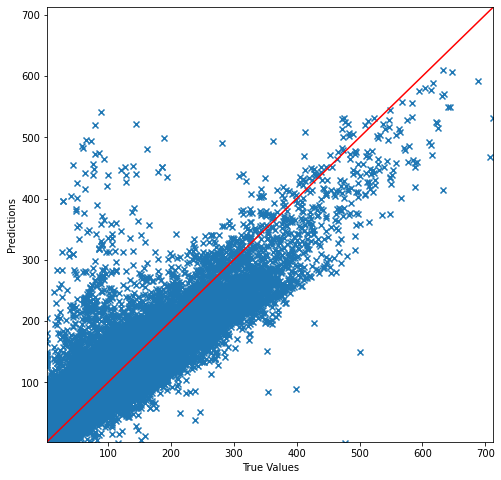

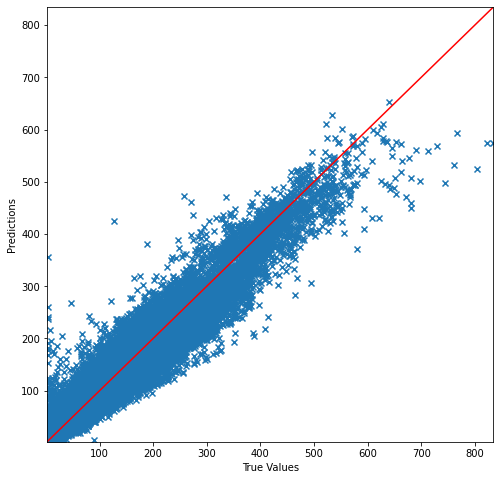

In [9]:
%%time
reg_linearsvm = svm.LinearSVR()
model_fit_evaluate(reg_linearsvm, X_train, y_train, X_validation, y_validation, X_test, y_test)

# 4. Outlier-robust regressors

Theil-Sen Estimator: robust multivariate regression model.

The algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency. Since the number of least square solutions is “n_samples choose n_subsamples”, it can be extremely large and can therefore be limited with max_subpopulation. If this limit is reached, the subsets are chosen randomly. In a final step, the spatial median (or L1 median) is calculated of all least square solutions.

Model 
 TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
===================Validation=====================
Coefficients: 
 [578.47831787  35.15271208 -17.91194105 229.44440544  87.45730284
 -58.95062142  20.9248779   90.14797731 -39.79245798   7.38232092
  -2.34909191  -2.58473822  -1.189111    -3.17936935  -2.46725448
  -0.82922651  -2.37215972  -3.48060859  -1.35958099  -1.70656908
  -2.19506268  -2.57664156  -4.21944538  -3.43636944  -4.21590373
  -3.37632189]
Mean Absolute Error: 19.030840888309037
Mean Squared Error: 934.4770053060241
Root Mean Squared Error: 30.569216628923026
Coefficient of determination: 0.8375128230363392
+-10 acc 0.4311229219454916
+-20 acc 0.6921698288115691
+-50 acc 0.9247883319943143
+-100 acc 0.9879333786539769
285027    83.0
285028    79.0
285029    80.0
285030    75.0
Name: PM2.5, dtype: float64
[73.66256464 73.6249330

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

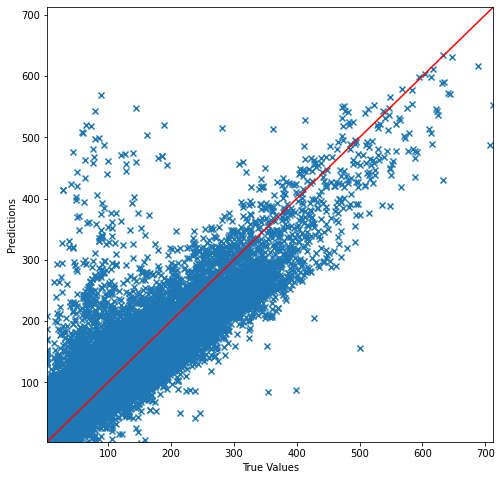

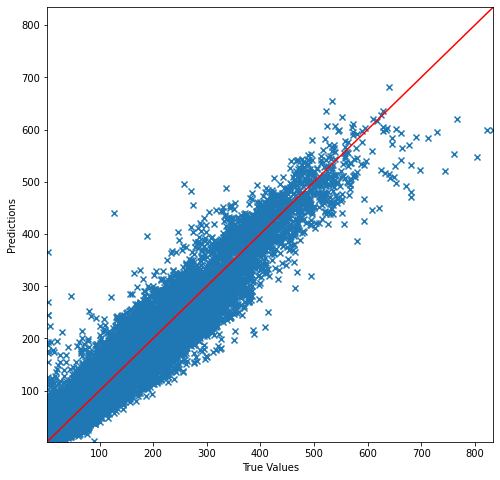

In [10]:
%%time
reg_huber = linear_model.TheilSenRegressor()
model_fit_evaluate(reg_huber, X_train, y_train, X_validation, y_validation, X_test, y_test)

# 5. Decision Trees Regression

Model 
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
===================Validation=====================
Feature Importances: 
 [7.67468699e-01 1.38122307e-02 1.21464823e-02 1.26466715e-01
 1.06356918e-02 1.66425903e-02 1.41498126e-02 2.37732255e-02
 5.31264835e-04 6.42114224e-03 5.88627156e-04 6.08987219e-04
 4.94786130e-04 5.48345239e-04 5.74426882e-04 4.71521326e-04
 4.06813459e-04 3.44276761e-04 4.75896432e-04 3.94227192e-04
 4.64295499e-04 5.36654990e-04 5.31178669e-04 5.01269657e-04
 5.05451922e-04 5.05387692e-04]
Mean Absolute Error: 17.20053766763488
Mean Squared Error: 883.3556859897411
Root Mean Squared Error: 29.721300206917952
Coefficient of determination: 0.846401815286759
+-10 acc 0.5184630121747729
+-20 acc 0

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

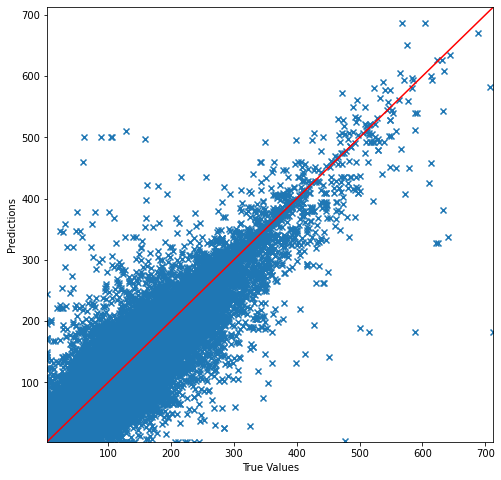

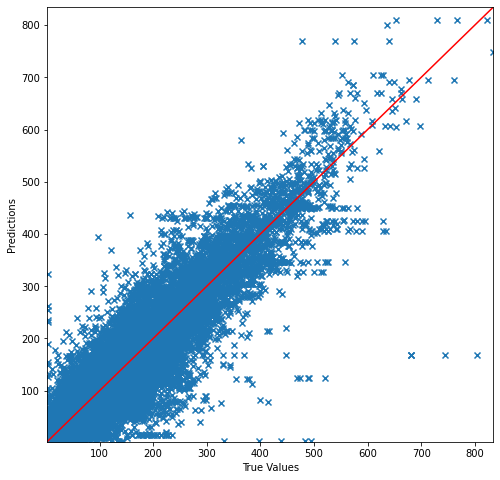

In [11]:
%%time
reg_dt = tree.DecisionTreeRegressor()
model_fit_evaluate(reg_dt, X_train, y_train, X_validation, y_validation, X_test, y_test)

# 6. XGBoost

In [12]:
import xgboost as xgb

training_df, validation_df, test_df = split_data(df)
X_train = training_df.drop(columns=["PM2.5"])
y_train = training_df["PM2.5"]

X_validation = validation_df.drop(columns=["PM2.5"])
y_validation = validation_df["PM2.5"]

X_test = test_df.drop(columns=["PM2.5"])
y_test = test_df["PM2.5"]

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Transformation might not be necessary for xgboost
# transformer = MinMaxScaler().fit(X_train)
# X_train = transformer.transform(X_train)
# transformer = MinMaxScaler().fit(X_validation)
# X_validation = transformer.transform(X_validation)

In [ ]:
model = xgb.XGBRegressor(
                 gamma=0,
                 booster='gbtree', #'gblinear'
                 eval_metric ='rmse',
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.8,
                 seed=42) 

In [ ]:
%%time
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation), (X_test, y_test)],
        eval_metric=['rmse'],
        verbose=False)

In [ ]:
def model_evaluate(reg, x_validation, y_validation):
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    
    # The coefficients
    if hasattr(reg, 'coef_'):
        print('Coefficients: \n', reg.coef_)
    if hasattr(reg, 'feature_importances_'):
        print('Feature Importances: \n', reg.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', metrics.r2_score(y_validation, y_validation_pred))
    
    # The line / model
    plt.figure(figsize=(8,8))
    lineStart = y_validation.min() 
    lineEnd = y_validation.max() 
    plt.scatter(y_validation, y_validation_pred, marker='x')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

In [ ]:
model_evaluate(model, X_validation, y_validation)

# Summary On Basic Models
- The lowest RMSE is 38.98 from XGBoost
- The highest Coefficient of Detemination is 0.768 from XGBoost
- VAR performs unexpected bad, probably due to some parameter settings or data preprocessing

Reference: 
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score